**FINAL PROJECT 2 : LOGISTIC REGRESSION DAN SVM**

**KELOMPOK 7**
1. Riko Fajarudin PYTN-KS10-023
2. Mochamad Raffli Ispriyanto PYTN-KS10-022

**INTRODUCTION**

Latar Belakang Pemilihan Kasus : Ingin membangun sebuah model klasifikasi yang bisa memprediksi terjadinya hujan di Australia berdasarkan nilai fitur yang diinputkan.

Data Penelitian : Data ini bernama Rain in Australia yang diperoleh dari https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Data ini digunakan untuk memprediksi apakah terjadi hujan pada keesokan hari dari tanggal pengamatan. Data ini adalah data hujan harian selama 10 tahun di berbagai lokasi di Australia. Jumlah dataset ini adalah 145.460 baris data dengan 23 atribut.
Atribut yang menjadi label kelas yaitu RainTomorrow yang berisi 'No' (tidak terjadi hujan besok harinya) dan 'Yes' (terjadi hujan besok harinya 1mm atau lebih).

Objective yang Ingin Dicapai : Model prediksi hujan yang dapat memberikan hasil akurasi yang maksimal dan model prediksi hujan yang dibangun berusaha untuk meminimumkan FN, sehingga model sebisa mungkin memberikan recall maksimum.


**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
%matplotlib inline

from scipy import stats

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut

# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif

# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# dimensionality reduction
from sklearn.decomposition import PCA

# modelling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# model performance
from sklearn import metrics

# save models
import pickle

**DATA LOADING**

In [2]:
df = pd.read_csv('rain.zip')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
atribut = df.columns.values
atribut

array(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'], dtype=object)

In [6]:
# Memilih atribut yang bertipe numerikal
numerical_columns = df.select_dtypes(include=['float64','int64']).columns.values

# Memilih atribut yang bertipe kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns.values

In [7]:
# print daftar atribut numerik dan kategorikal
print('Daftar Atribut Numerik')
print(numerical_columns)
print('')
print('Daftar Atribut Kategorikal')
print(categorical_columns)

Daftar Atribut Numerik
['MinTemp' 'MaxTemp' 'Rainfall' 'Evaporation' 'Sunshine' 'WindGustSpeed'
 'WindSpeed9am' 'WindSpeed3pm' 'Humidity9am' 'Humidity3pm' 'Pressure9am'
 'Pressure3pm' 'Cloud9am' 'Cloud3pm' 'Temp9am' 'Temp3pm']

Daftar Atribut Kategorikal
['Date' 'Location' 'WindGustDir' 'WindDir9am' 'WindDir3pm' 'RainToday'
 'RainTomorrow']


In [8]:
df[numerical_columns].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**DATA CLEANING**

In [9]:
# rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns={
            'Date':'Tanggal',
            'Location':'Kota',
            'MinTemp':'Suhu Minimum',
            'MaxTemp':'Suhu Maximum',
            'Rainfall':'Curah Hujan',
            'Evaporation':'Penguapan',
            'Sunshine':'Jam Cerah',
            'WindGustDir':'Arah Angin 24 jam',
            'WindGustSpeed':'Kecepatan Angin 24 jam',
            'WindDir9am':'Arah Angin 9 Pagi',
            'WindDir3pm':'Arah Angin 3 Sore',
            'WindSpeed9am':'Kecepatan Angin 9 Pagi',
            'WindSpeed3pm':'Kecepatan Angin 3 Sore',
            'Humidity9am':'Kelembaban 9 Pagi',
            'Humidity3pm':'Kelembaban 3 Sore',
            'Pressure9am':'Tekanan Udara 9 Pagi',
            'Pressure3pm':'Tekanan Udara 3 Sore',
            'Cloud9am':'Awan 9 Pagi',
            'Cloud3pm':'Awan 3 Sore',
            'Temp9am':'Suhu Celcius 9 Pagi',
            'Temp3pm':'Suhu Celcius 3 Sore',
            'RainToday':'Hari ini Hujan',
            'RainTomorrow':'Hari besok Hujan',
        },
    )
    return df

In [10]:
# memilih atribut numerikal dan kategorikal
def attributes_type(df,include_numerical=['float64','int64'], include_categorical=['object']):
    numerical_columns = df.select_dtypes(include=include_numerical).columns.values
    categorical_columns = df.select_dtypes(include=include_categorical).columns.values
    return numerical_columns,categorical_columns

In [11]:
df = rename_columns_df(df)
numerical_columns,categorical_columns = attributes_type(df)
df

,Tanggal,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,...,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [12]:
df.drop(df[df['Hari besok Hujan'].isnull()].index.values,inplace=True)

In [13]:
for cat_col in categorical_columns:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
    
for num_col in numerical_columns:
    df[num_col].fillna(df[num_col].median(),inplace=True)   

In [14]:
df.isnull().sum()

Tanggal                   0
Kota                      0
Suhu Minimum              0
Suhu Maximum              0
Curah Hujan               0
Penguapan                 0
Jam Cerah                 0
Arah Angin 24 jam         0
Kecepatan Angin 24 jam    0
Arah Angin 9 Pagi         0
Arah Angin 3 Sore         0
Kecepatan Angin 9 Pagi    0
Kecepatan Angin 3 Sore    0
Kelembaban 9 Pagi         0
Kelembaban 3 Sore         0
Tekanan Udara 9 Pagi      0
Tekanan Udara 3 Sore      0
Awan 9 Pagi               0
Awan 3 Sore               0
Suhu Celcius 9 Pagi       0
Suhu Celcius 3 Sore       0
Hari ini Hujan            0
Hari besok Hujan          0
dtype: int64

In [15]:
# mengubah tipe data menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# ambil Tahun,Bulan,Hari dan jadikan atribut
df['Tahun'] = df['Tanggal'].dt.year
df['Bulan'] = df['Tanggal'].dt.month_name()
df['Hari'] = df['Tanggal'].dt.day_name()

# drop kolom 'Tanggal'
df.drop('Tanggal', axis=1,inplace=True)

In [16]:
df

,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan,Tahun,Bulan,Hari
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,December,Monday
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,December,Tuesday
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,December,Wednesday
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,December,Thursday
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,December,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,8.5,E,31.0,ESE,E,...,1021.2,5.0,5.0,9.4,20.9,No,No,2017,June,Tuesday
145455,Uluru,2.8,23.4,0.0,4.8,8.5,E,31.0,SE,ENE,...,1020.3,5.0,5.0,10.1,22.4,No,No,2017,June,Wednesday
145456,Uluru,3.6,25.3,0.0,4.8,8.5,NNW,22.0,SE,N,...,1019.1,5.0,5.0,10.9,24.5,No,No,2017,June,Thursday
145457,Uluru,5.4,26.9,0.0,4.8,8.5,N,37.0,SE,WNW,...,1016.8,5.0,5.0,12.5,26.1,No,No,2017,June,Friday


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Kota                    142193 non-null  object 
 1   Suhu Minimum            142193 non-null  float64
 2   Suhu Maximum            142193 non-null  float64
 3   Curah Hujan             142193 non-null  float64
 4   Penguapan               142193 non-null  float64
 5   Jam Cerah               142193 non-null  float64
 6   Arah Angin 24 jam       142193 non-null  object 
 7   Kecepatan Angin 24 jam  142193 non-null  float64
 8   Arah Angin 9 Pagi       142193 non-null  object 
 9   Arah Angin 3 Sore       142193 non-null  object 
 10  Kecepatan Angin 9 Pagi  142193 non-null  float64
 11  Kecepatan Angin 3 Sore  142193 non-null  float64
 12  Kelembaban 9 Pagi       142193 non-null  float64
 13  Kelembaban 3 Sore       142193 non-null  float64
 14  Tekanan Udara 9 Pagi

In [18]:
numerical_columns,categorical_columns = attributes_type(df)

# numerical
diskrit_columns = ['Awan 9 Pagi','Awan 3 Sore','Tahun']
continuous_columns = [col for col in numerical_columns if col not in diskrit_columns]

# categorical
ordinal_columns = ['Hari ini Hujan', 'Hari besok Hujan']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

**EKSPLORASI DATA**

Text(0, 0.5, '')

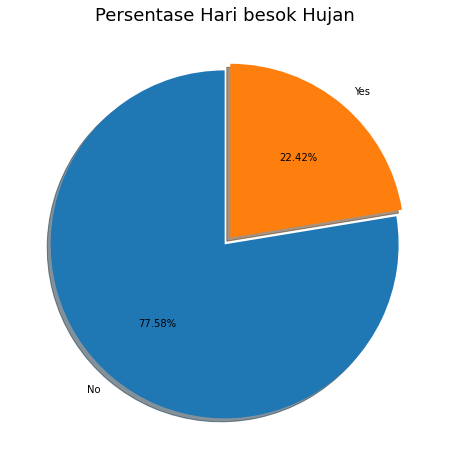

In [19]:
df['Hari besok Hujan'].value_counts().plot(kind='pie',
                                            figsize=(10,8),
                                            explode=[0,0.05],
                                            autopct='%.2f%%',
                                            startangle=90,
                                            shadow=True)
plt.title('Persentase Hari besok Hujan', size=18)
plt.ylabel('')

Text(0.5, 0, 'Hari besok Hujan')

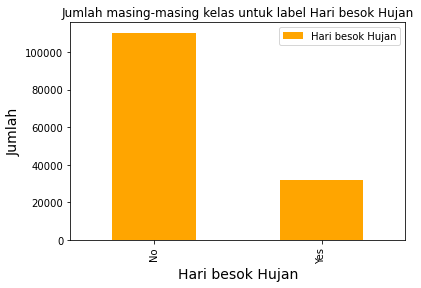

In [20]:

df.groupby('Hari besok Hujan').agg({'Hari besok Hujan':'count'}).plot(kind='bar',
                                                                      figsize=(6,4),
                                                                      color='orange')
plt.title('Jumlah masing-masing kelas untuk label Hari besok Hujan', size=12)
plt.ylabel('Jumlah', size=14)
plt.xlabel('Hari besok Hujan', size=14)

Text(0.5, 1.0, 'Jumlah kejadian Hari besok Hujan = No')

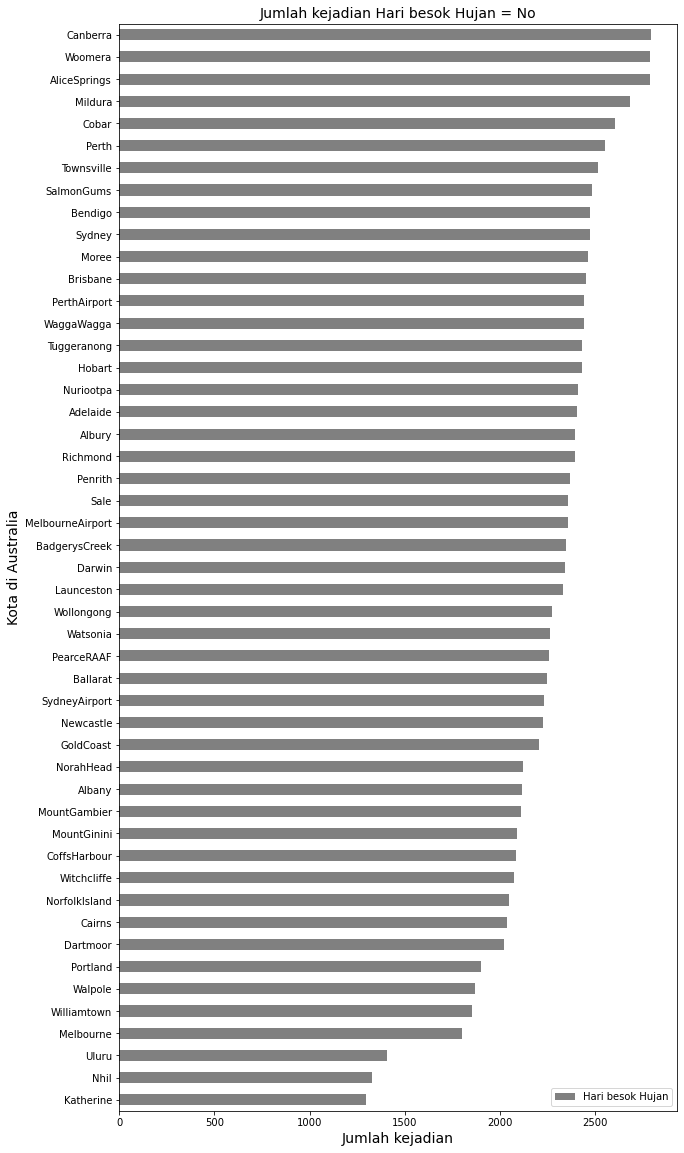

In [22]:
# kelompokkan data berdasarkan Kota untuk label = 'No'
kota_hujan_no = df[(df['Hari besok Hujan']=='No')].groupby('Kota').agg({'Hari besok Hujan':'count'}).sort_values(by='Hari besok Hujan')
kota_hujan_no.plot(kind='barh', 
                figsize=(10,20), 
                color=['grey'])

plt.ylabel('Kota di Australia', fontsize=14)
plt.xlabel('Jumlah kejadian', fontsize=14)
plt.title('Jumlah kejadian Hari besok Hujan = No',fontsize=14)

Text(0.5, 1.0, 'Jumlah kejadian Hari besok Hujan = Yes')

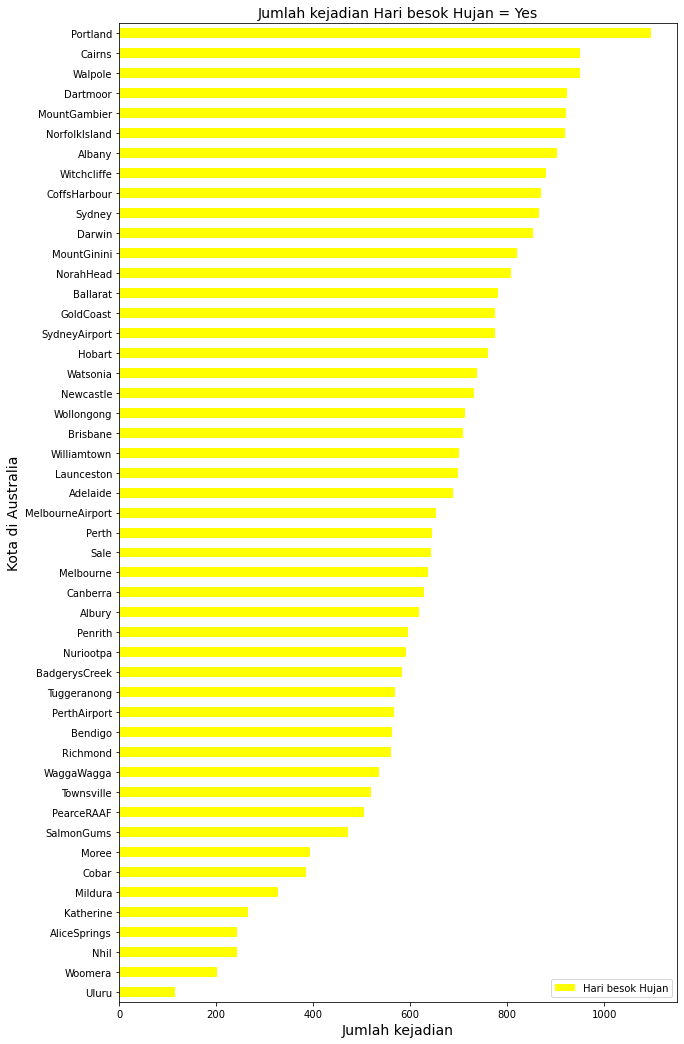

In [23]:
# kelompokkan data berdasarkan Kota untuk label = 'Yes'
kota_hujan_yes = df[(df['Hari besok Hujan']=='Yes')].groupby('Kota').agg({'Hari besok Hujan':'count'}).sort_values(by='Hari besok Hujan')
kota_hujan_yes.plot(kind='barh', 
                    figsize=(10,18), 
                    color=['yellow'])

plt.ylabel('Kota di Australia', fontsize=14)
plt.xlabel('Jumlah kejadian', fontsize=14)
plt.title('Jumlah kejadian Hari besok Hujan = Yes',fontsize=14)

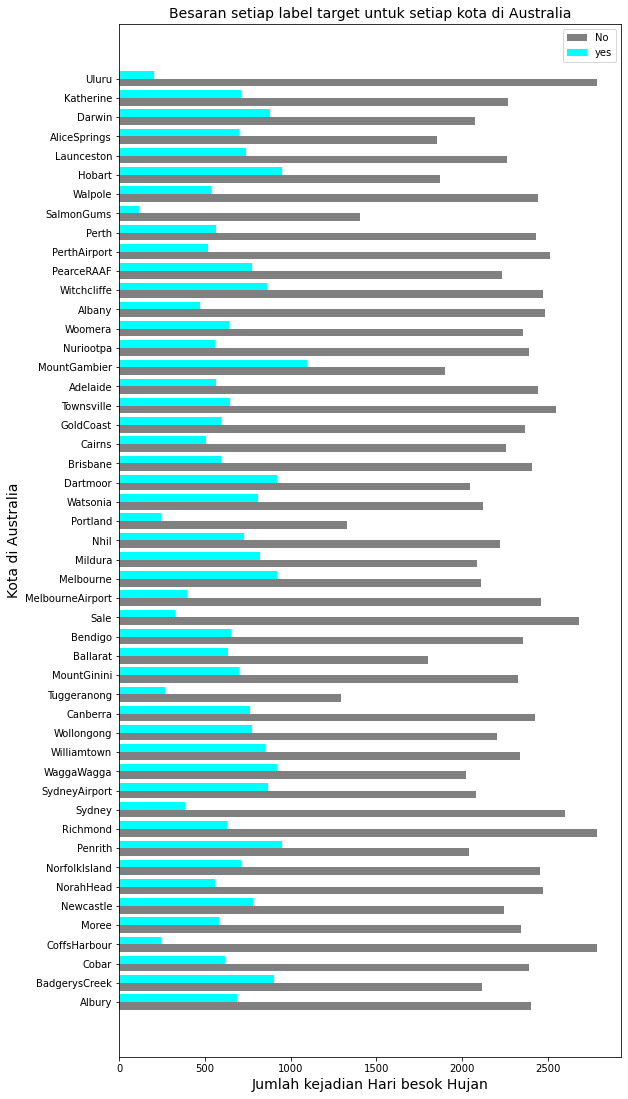

In [24]:
# Target 'No' berdasarkan kota
kota_hujan_no = df[(df['Hari besok Hujan']=='No')].groupby('Kota').count()['Hari besok Hujan'].values

# Target 'Yes' berdasarkan kota
kota_hujan_yes = df[(df['Hari besok Hujan']=='Yes')].groupby('Kota').count()['Hari besok Hujan'].values

sumbu_y_ticks = list(df['Kota'].unique())
sumbu_y_axis = np.arange(0,len(sumbu_y_ticks),1)

plt.figure(figsize=(9,19))
plt.barh(sumbu_y_axis-0.2, 
         kota_hujan_no,0.4,
         label='No',
         color='grey')
plt.barh(sumbu_y_axis + 0.2, 
         kota_hujan_yes, 0.4, 
         label = 'yes',
         color='aqua')
plt.yticks(sumbu_y_axis,sumbu_y_ticks)
plt.ylabel('Kota di Australia', fontsize=14)
plt.xlabel('Jumlah kejadian Hari besok Hujan', fontsize=14)
plt.title('Besaran setiap label target untuk setiap kota di Australia', fontsize=14)
plt.legend()
plt.show()

Menampilkan histogram untuk setiap atribut bertipe continous

In [25]:
labelencoder_visualize = OrdinalEncoder()
df[categorical_columns] = labelencoder_visualize.fit_transform(df[categorical_columns])

In [26]:
def visualize_data_distribution(data_df, features, targetName='Hari besok Hujan', targetLabel=['No','Yes']):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15, 4))
        plt.title(col)
        plt.subplot(131)
        sns.histplot(
            data_df[col][data_df[targetName]==0],
            label=targetLabel[0]+' :'+' Skew = ' +
            str(np.round(data_df[col][data_df[targetName] == 0].skew(), 2)),
            kde=True,
            color='y',
            stat='density',
            linewidth=0
        )
        sns.histplot(
            data_df[col][data_df[targetName]==1],
            label=targetLabel[1]+' :'+' Skew = ' +
            str(np.round(data_df[col][data_df[targetName] == 1].skew(), 2)),
            kde=True,
            color='r',
            stat='density',
            linewidth=0
        )
        plt.legend()
        plt.subplot(132)
        sns.boxplot(x = data_df[targetName],
            y = data_df[col],
            hue = data_df[targetName])
        plt.subplot(133)
        stats.probplot(x=data_df[col], plot=plt)
        plt.tight_layout()
        plt.show()

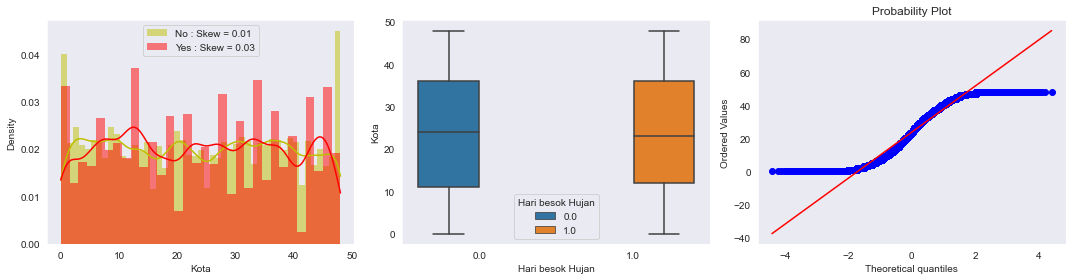

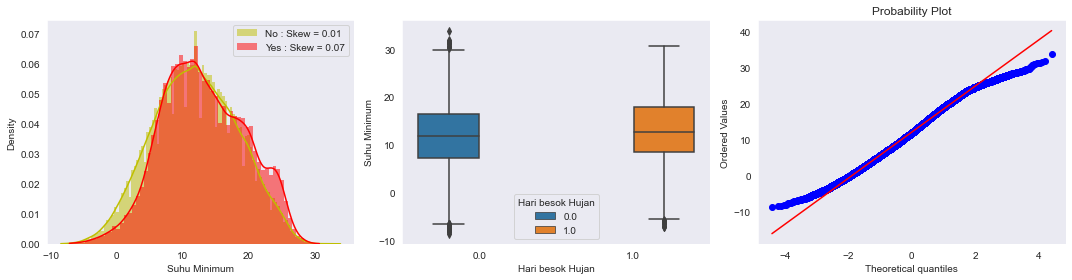

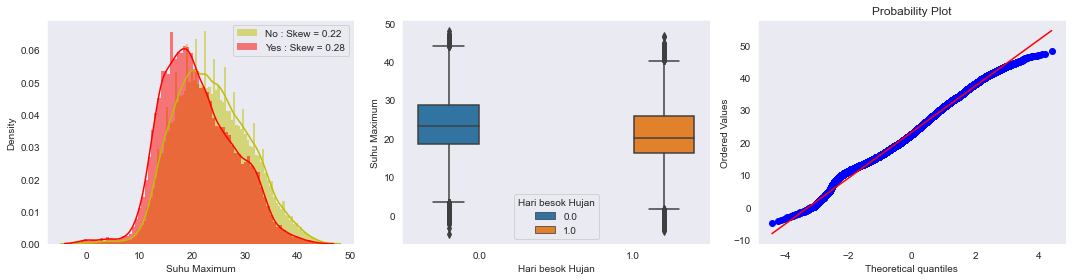

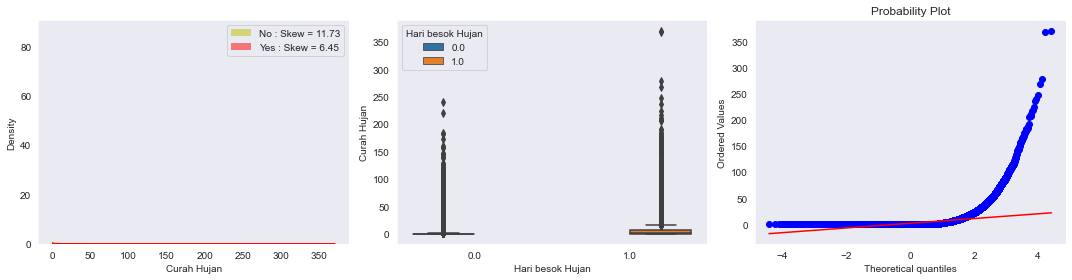

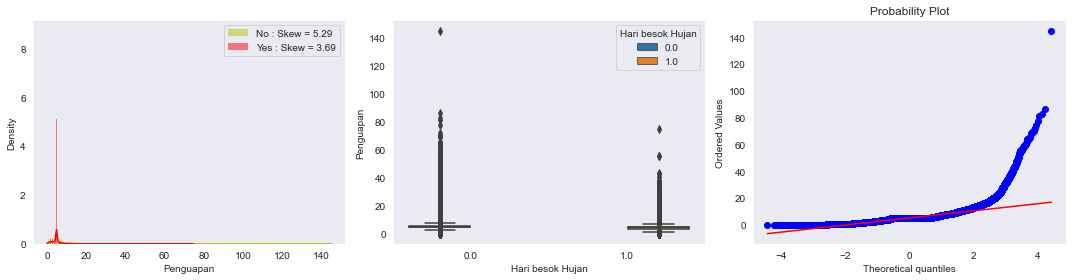

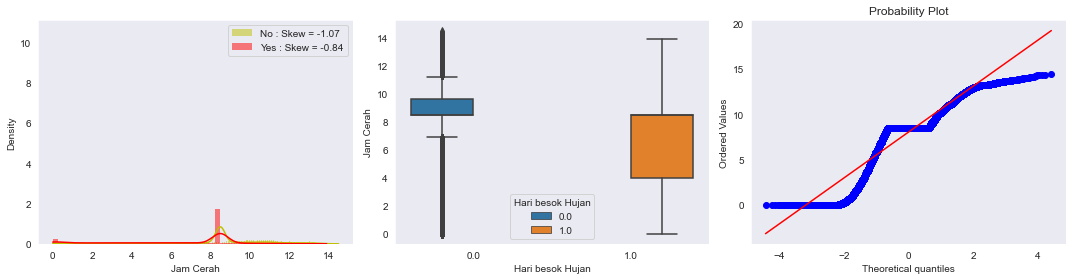

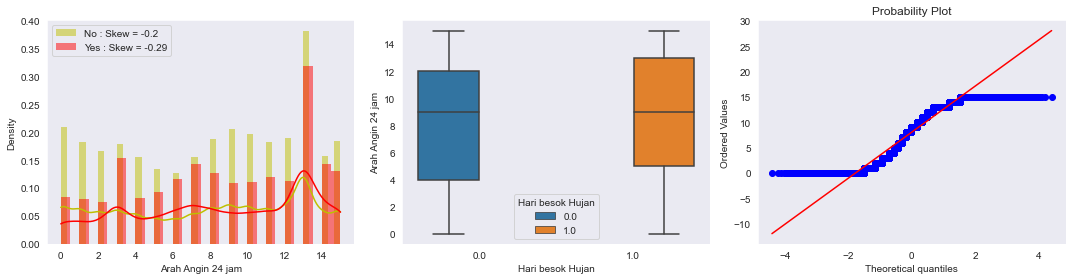

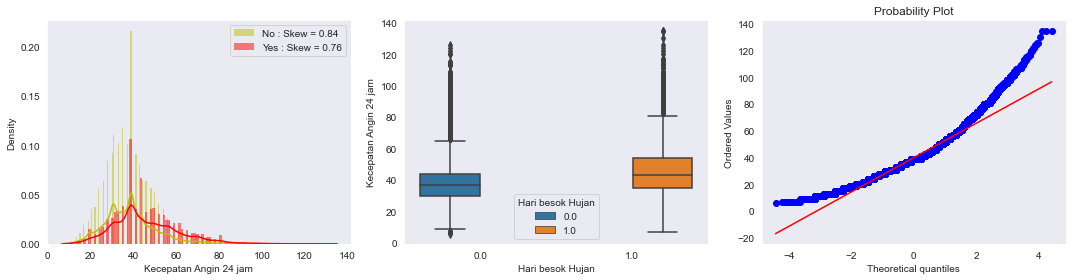

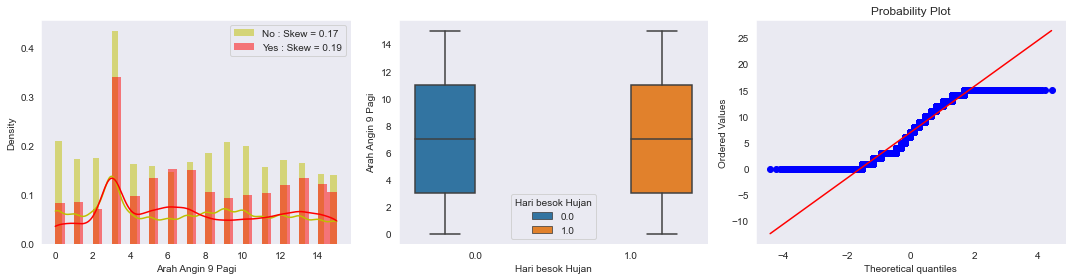

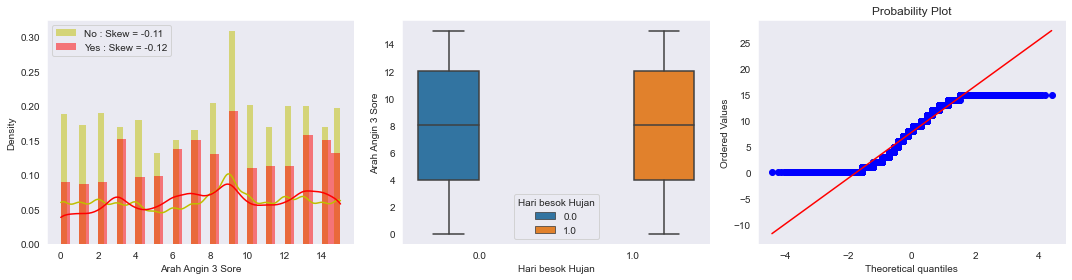

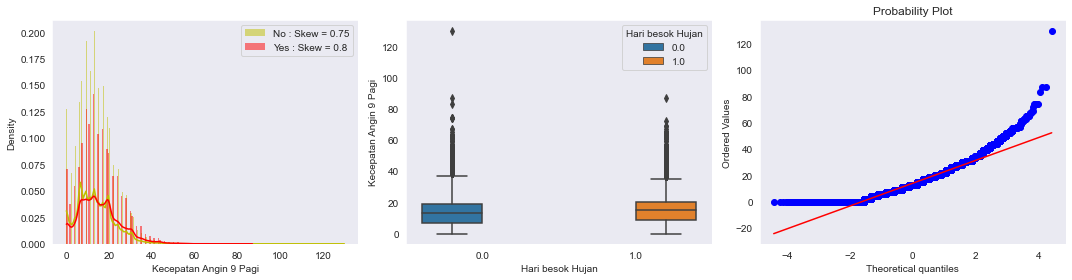

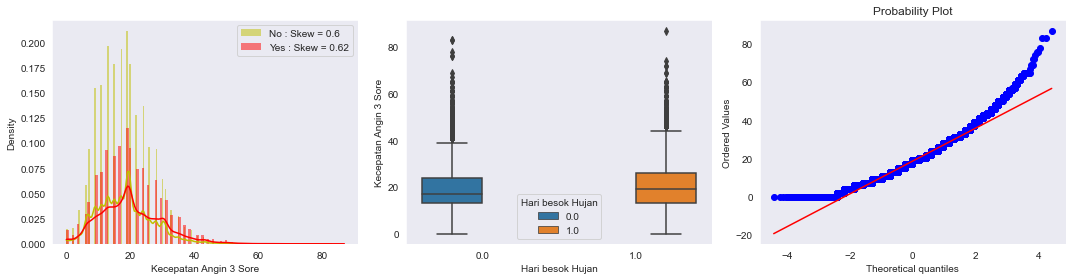

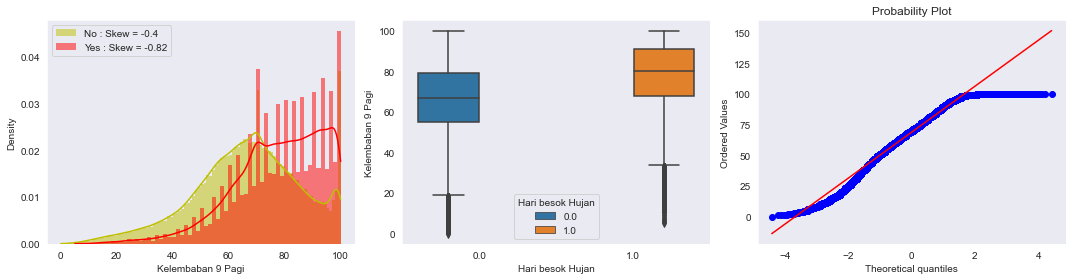

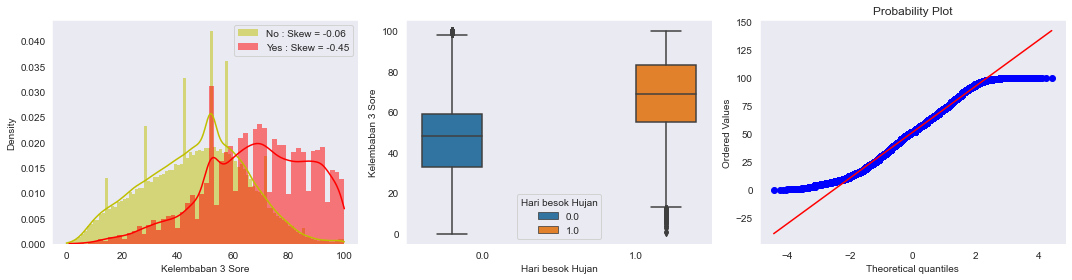

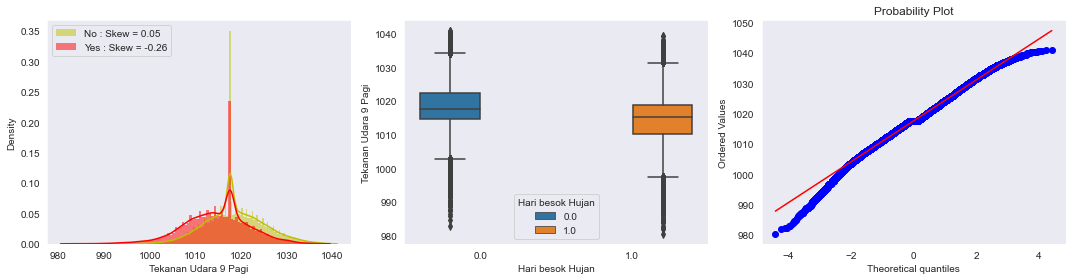

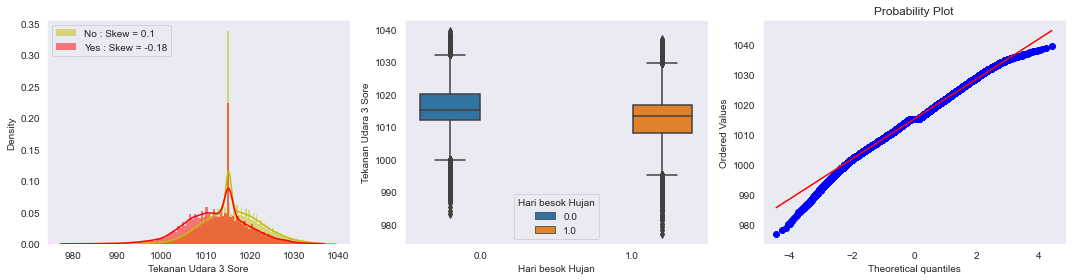

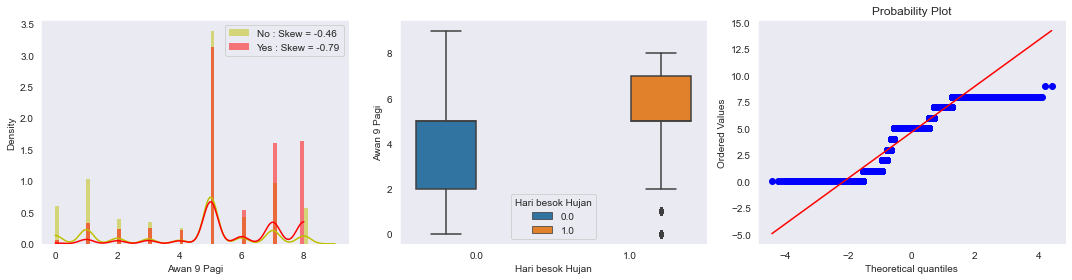

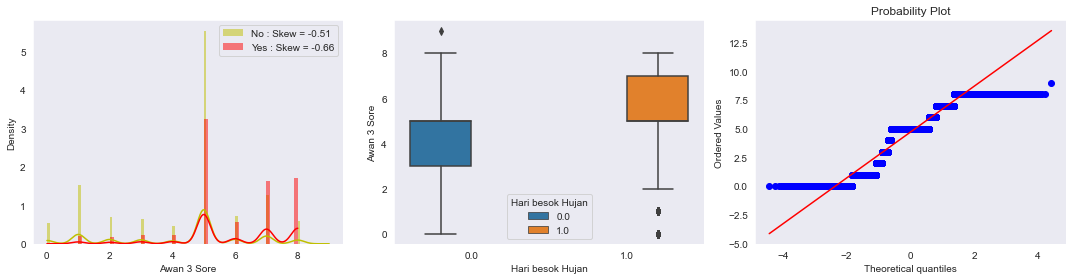

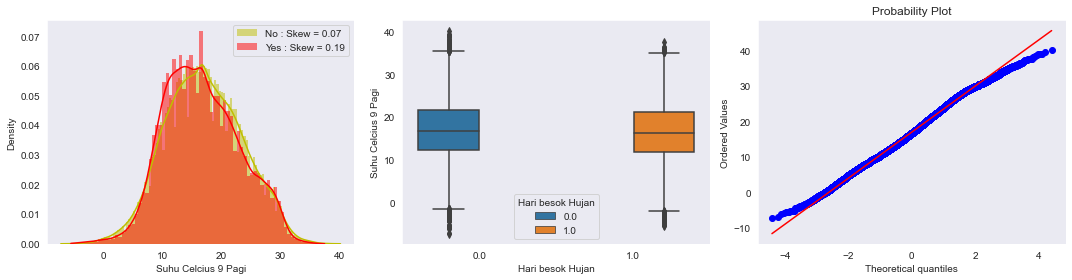

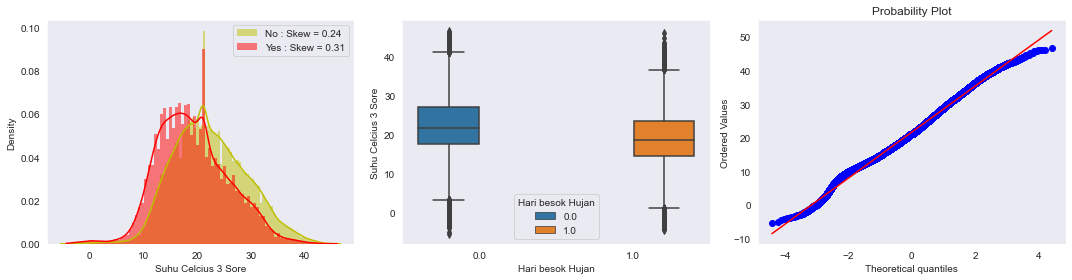

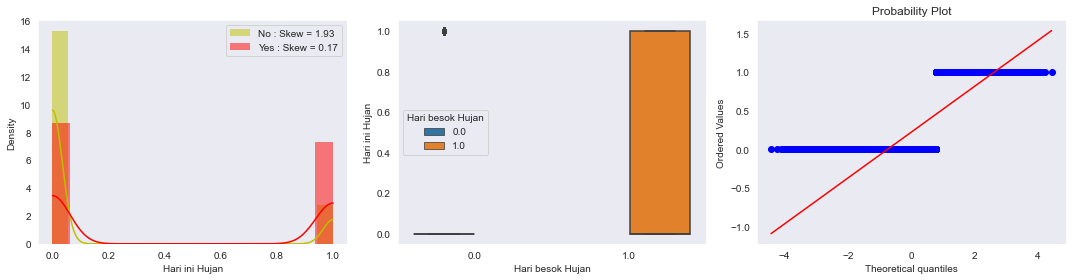

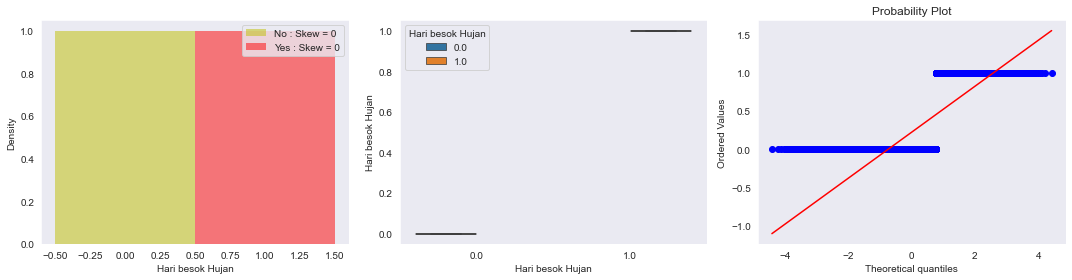

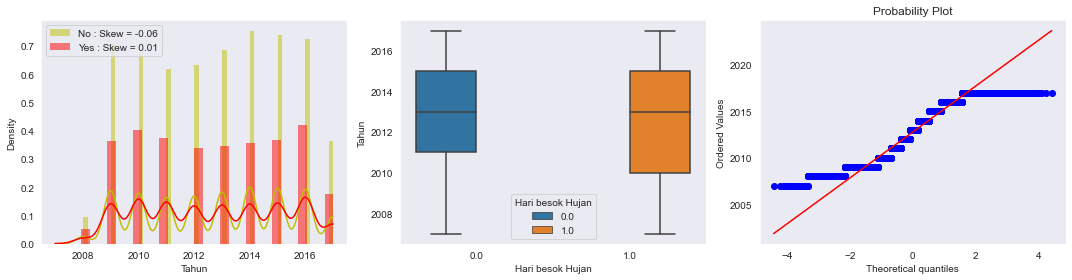

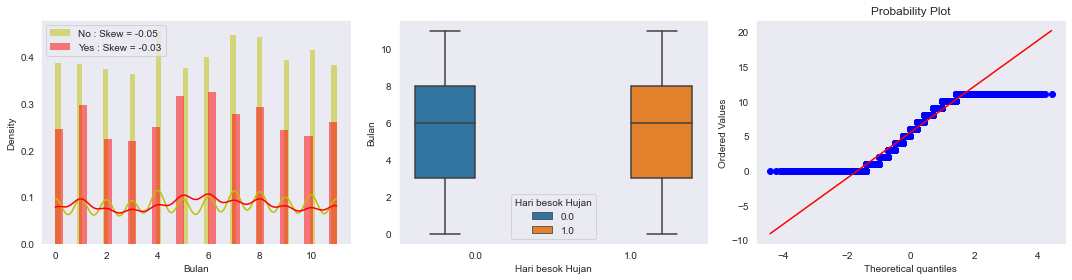

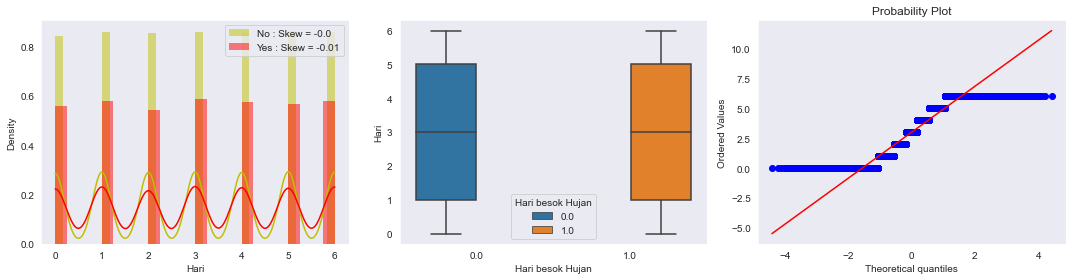

In [27]:
visualize_data_distribution(df,df.columns.values)

ANALISIS

1. Ada beberapa atribut yang mengandung outlier
2. Masih ada beberapa atribut yang distribusinya tidak normal dan cenderung skew.
3. Seluruh atribut continous (kecuali Kelembaban 3 Sore) memiliki outlier yang cukup signifikan
4. Untuk atribut numerikal,ada beberapa atribut yang distribusi kedua kelasnya tidak sama, seperti Curah Hujan, Penguapan, Jam Cerah, Kelembaban 9 Pagi, Kelembaban 3 Sore, Tekanan Udara 9 Pagi, Suhu Celcius 3 Sore

Hubungan 'Hari ini Hujan' dengan 'Hari besok Hujan'

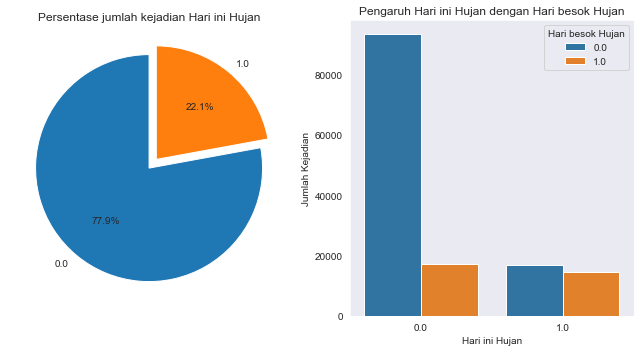

In [28]:
fig,ax = plt.subplots(1,2, figsize=(9,5))

# persentase 'Hari ini Hujan' dalam pie chart
df['Hari ini Hujan'].value_counts().plot(kind='pie', 
                                         ax=ax[0], 
                                         startangle=90,
                                         autopct='%.1f%%',
                                         explode=[0,0.1])
ax[0].set_title('Persentase jumlah kejadian Hari ini Hujan')
ax[0].set_ylabel('')

# Pengaruh 'Hari ini Hujan' dengan 'Besok Hujan' dalam bar chart
sns.countplot(x='Hari ini Hujan',
              hue='Hari besok Hujan',
              data=df)
ax[1].set_title('Pengaruh Hari ini Hujan dengan Hari besok Hujan')
ax[1].set_ylabel('Jumlah Kejadian')
fig.tight_layout()

ANALISIS

1. Ada 78,1% 'Hari ini Hujan' berlabel 'No'
2. Jika 'Hari ini Hujan' dengan label 'No' maka besar peluang bahwa 'Hari besok Hujan' berlabel 'No'.
3. Jumlah kejadian untuk setiap pasangan lainnya adalah seimbang, jadi jika 'Hari ini Hujan' tidak bisa dijadikan satu-satunya penentu 'Hari besok Hujan'.

ANOVA F-Score

In [29]:
X_numerical = df.loc[:,numerical_columns]
y_numerical= df['Hari besok Hujan'].replace({'Yes':1,'No':0})

anova_fs = SelectKBest(score_func=f_classif,k='all')

anova_fs = anova_fs.fit(X_numerical,y_numerical)

df_anova_fs = pd.Series(data=anova_fs.scores_, index=numerical_columns).sort_values(ascending=False)

Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

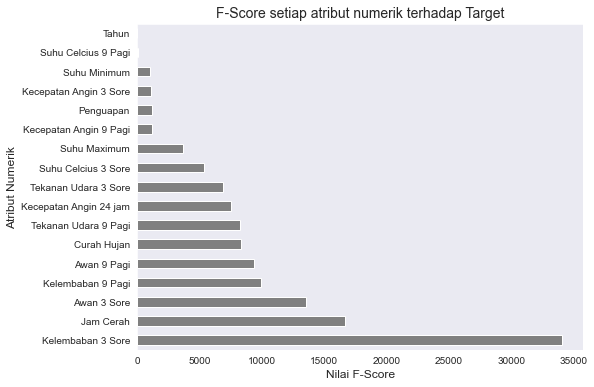

In [30]:
# Plotting score setiap atribut
plt.figure(figsize=(8,6))
df_anova_fs.plot(kind='barh',
                 color='grey')
plt.ylabel('Atribut Numerik', fontsize=12)
plt.xlabel('Nilai F-Score', fontsize=12)
plt.title('F-Score setiap atribut numerik terhadap Target',fontsize=14)

ANALISIS

Interpretasi hasil gambar di atas:

1. Semakin besar nilai F-score semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2. Semakin kecil nilai F-Score semakin kecil hubungan atau korelasi atribut tersebut dengan kelas target
3. Atribut Tahun, Suhu Celcius 9 Pagi menjadi dua atribut dengan kepentingan atribut terkecil dengan kelas target
4. Atribut Kelembabab 3 Sore paling menentukan apakah kejadian pada 'Hari besok Hujan'

In [31]:
numerical_columns_retain = list(df_anova_fs[:3].index.values)

In [32]:
# remove atribut 'Hari besok Hujan' karena merupakan target yang ingin dicari 
ls_categorical_columns = list(categorical_columns)
ls_categorical_columns.remove('Hari besok Hujan')

# Menyiapkan data (atribut dan target) hanya untuk tipe kategorikal
X_kategorikal = df[ls_categorical_columns]
y_kategorikal= y_numerical

# Encoding categorical attributes
ordinal_encoder = OrdinalEncoder()

# fit into data
ordinal_encoder = ordinal_encoder.fit(X_kategorikal)

# transform into data
X_kategorikal_encoded = ordinal_encoder.transform(X_kategorikal)

In [33]:
# instansiasi objek MutualInformation
mutual_info_fs = SelectKBest(score_func=mutual_info_classif, k='all')

# fit into encoded data
mutual_info_fs = mutual_info_fs.fit(X_kategorikal_encoded,y_kategorikal)

df_mutual_info_fs = pd.Series(data=mutual_info_fs.scores_, index=ls_categorical_columns).sort_values(ascending=False)

Text(0.5, 1.0, 'Mutual Information setiap atribut kategorikal terhadap Target')

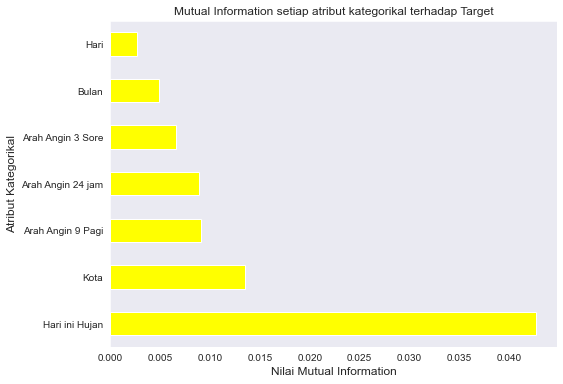

In [34]:
# Plotting score setiap atribut kategorikal
plt.figure(figsize=(8,6))
df_mutual_info_fs.plot(kind='barh', 
                       color='yellow')
plt.ylabel('Atribut Kategorikal', fontsize=12)
plt.xlabel('Nilai Mutual Information', fontsize=12)
plt.title('Mutual Information setiap atribut kategorikal terhadap Target',fontsize=12)

In [35]:
categorical_columns_retain = list(df_mutual_info_fs[:3].index.values)

ANALISIS

Interpretasi hasil gambar di atas:

1. Semakin besar nilai Mutual Information semakin besar hubungan atau korelasi atribut tersebut dengan kelas target
2. Semakin kecil nilai Mutual Information semakin kecil hubungan atau korelasi atribut tersebut dengan kelas target
3. Atribut Hari,Bulan menjadi dua atribut dengan kepentingan atribut yang paling kecil dengan kelas target
4. Atribut yang dipertahankan Hari ini Hujan, Kota, Arah Angin 9 Pagi

Menghitung central tendency

MEAN

In [36]:
rerata = df[numerical_columns].mean()
rerata

Suhu Minimum                12.185565
Suhu Maximum                23.225365
Curah Hujan                  2.326738
Penguapan                    5.183213
Jam Cerah                    8.042236
Kecepatan Angin 24 jam      39.920123
Kecepatan Angin 9 Pagi      13.992489
Kecepatan Angin 3 Sore      18.644279
Kelembaban 9 Pagi           68.858235
Kelembaban 3 Sore           51.495742
Tekanan Udara 9 Pagi      1017.648460
Tekanan Udara 3 Sore      1015.252481
Awan 9 Pagi                  4.649568
Awan 3 Sore                  4.702658
Suhu Celcius 9 Pagi         16.985681
Suhu Celcius 3 Sore         21.675977
Tahun                     2012.758926
dtype: float64

MEDIAN

In [37]:
nilai_tengah = df[numerical_columns].median()
nilai_tengah

Suhu Minimum                12.0
Suhu Maximum                22.6
Curah Hujan                  0.0
Penguapan                    4.8
Jam Cerah                    8.5
Kecepatan Angin 24 jam      39.0
Kecepatan Angin 9 Pagi      13.0
Kecepatan Angin 3 Sore      19.0
Kelembaban 9 Pagi           70.0
Kelembaban 3 Sore           52.0
Tekanan Udara 9 Pagi      1017.6
Tekanan Udara 3 Sore      1015.2
Awan 9 Pagi                  5.0
Awan 3 Sore                  5.0
Suhu Celcius 9 Pagi         16.7
Suhu Celcius 3 Sore         21.1
Tahun                     2013.0
dtype: float64

In [38]:
df_mean_median = pd.DataFrame(data={'mean':rerata,
                                    'median':nilai_tengah}
                              ).transpose()
df_mean_median

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
mean,12.185565,23.225365,2.326738,5.183213,8.042236,39.920123,13.992489,18.644279,68.858235,51.495742,1017.64846,1015.252481,4.649568,4.702658,16.985681,21.675977,2012.758926
median,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000


MODUS

In [39]:
df.mode()

,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan,Tahun,Bulan,Hari
0,9.0,12.0,22.6,0.0,4.8,8.5,13.0,39.0,3.0,9.0,...,1015.2,5.0,5.0,16.7,21.1,0.0,0.0,2016,8.0,3.0


ANALISIS PERHITUNGAN CENTRAL TENDENCY

1. Hampir mayoritas atribut bertipe numerikal memiliki nilai mean, median, dan modus yang hampir sama (selisihnya cukup kecil). Hal ini bisa menandakan bahwa mayoritas distribusi data pada atribut numerik cenderung simetris. Namun, masih ada beberapa atribut numerik yang selisih antara mean dan median nya cukup besar (cenderung tidak simetris), seperti Curah Hujan, Penguapan, Kecepatan Angin 24 Jam, Kecepatan Angin 9 Pagi, dan Kelembaban 9 Pagi.
2. Mayoritas Arah Angin 24 Jam pada sampel dataset mengarah ke barat (W).
3. Sampel dataset didonimasi oleh label kelas 'Hari ini Hujan' dan 'Hari besok Hujan' berlabel No.

Menghitung measure of spread

Sampel Variance

In [40]:
df[numerical_columns].var(ddof=1).sort_values()

Awan 3 Sore                 4.489116
Awan 9 Pagi                 5.264075
Tahun                       6.457981
Jam Cerah                   7.670892
Penguapan                  10.146782
Suhu Minimum               40.818501
Suhu Celcius 9 Pagi        41.889455
Tekanan Udara 3 Sore       44.646586
Tekanan Udara 9 Pagi       45.512123
Suhu Celcius 3 Sore        47.213976
Suhu Maximum               50.546653
Curah Hujan                71.004650
Kecepatan Angin 3 Sore     76.067840
Kecepatan Angin 9 Pagi     78.351074
Kecepatan Angin 24 jam    172.676204
Kelembaban 9 Pagi         358.439999
Kelembaban 3 Sore         421.572337
dtype: float64

Sampel Standar Deviasi

In [41]:
df[numerical_columns].std(ddof=1).sort_values()

Awan 3 Sore                2.118753
Awan 9 Pagi                2.294357
Tahun                      2.541256
Jam Cerah                  2.769638
Penguapan                  3.185401
Suhu Minimum               6.388936
Suhu Celcius 9 Pagi        6.472206
Tekanan Udara 3 Sore       6.681810
Tekanan Udara 9 Pagi       6.746267
Suhu Celcius 3 Sore        6.871243
Suhu Maximum               7.109617
Curah Hujan                8.426426
Kecepatan Angin 3 Sore     8.721688
Kecepatan Angin 9 Pagi     8.851614
Kecepatan Angin 24 jam    13.140632
Kelembaban 9 Pagi         18.932512
Kelembaban 3 Sore         20.532227
dtype: float64

Skewness

In [42]:
df[numerical_columns].skew().sort_values(ascending=False)

Curah Hujan               9.934023
Penguapan                 5.140075
Kecepatan Angin 24 jam    0.918436
Kecepatan Angin 9 Pagi    0.782261
Kecepatan Angin 3 Sore    0.635020
Suhu Celcius 3 Sore       0.247242
Suhu Maximum              0.225763
Suhu Celcius 9 Pagi       0.092524
Kelembaban 3 Sore         0.033042
Suhu Minimum              0.024345
Tahun                    -0.042629
Tekanan Udara 3 Sore     -0.046081
Tekanan Udara 9 Pagi     -0.098977
Kelembaban 9 Pagi        -0.488110
Awan 9 Pagi              -0.551152
Awan 3 Sore              -0.562072
Jam Cerah                -1.110020
dtype: float64

In [43]:
# menghitung kuartile 1,2,3
Q1 = df[numerical_columns].quantile(0.25)
Q2 = df[numerical_columns].quantile(0.5)
Q3 = df[numerical_columns].quantile(0.75)

# menghitung IQR (selisih Q3 dengan Q1)
IQR = Q3-Q1

Range

In [44]:
maksimal = df[numerical_columns].max()
minimal = df[numerical_columns].min()
ranges =  maksimal - minimal

In [45]:
df_variability = pd.DataFrame(data={'Q1':Q1,
                                    'Q2':Q2,
                                    'Q3':Q3,
                                    'IQR':IQR,
                                    'Maximum':maksimal,
                                    'Minimum':minimal,
                                    'Ranges':ranges}
                              ).transpose()
df_variability

,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Kecepatan Angin 24 jam,Kecepatan Angin 9 Pagi,Kecepatan Angin 3 Sore,Kelembaban 9 Pagi,Kelembaban 3 Sore,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Tahun
Q1,7.6,17.9,0.0,4.0,8.2,31.0,7.0,13.0,57.0,37.0,1013.5,1011.0,3.0,4.0,12.3,16.7,2011.0
Q2,12.0,22.6,0.0,4.8,8.5,39.0,13.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1,2013.0
Q3,16.8,28.2,0.6,5.4,8.7,46.0,19.0,24.0,83.0,65.0,1021.8,1019.4,6.0,6.0,21.5,26.3,2015.0
IQR,9.2,10.3,0.6,1.4,0.5,15.0,12.0,11.0,26.0,28.0,8.3,8.4,3.0,2.0,9.2,9.6,4.0
Maximum,33.9,48.1,371.0,145.0,14.5,135.0,130.0,87.0,100.0,100.0,1041.0,1039.6,9.0,9.0,40.2,46.7,2017.0
Minimum,-8.5,-4.8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.5,977.1,0.0,0.0,-7.2,-5.4,2007.0
Ranges,42.4,52.9,371.0,145.0,14.5,129.0,130.0,87.0,100.0,100.0,60.5,62.5,9.0,9.0,47.4,52.1,10.0


ANALISIS MEASURE OF SPREAD

1. Sebaran data dapat dijelaskan dengan menggunakan variance dan/atau standar deviasi. Namun standar deviasi lebih cocok daripada variance karena memiliki satuan yang sama dengan data points.
2. Atribut Awan 3 Sore memiliki sebaran data yang tidak bervariasi, sedangkan atribut Kelembaban 3 Sore memiliki sebaran data yang paling bervariasi.
3. Hasil perhitungan skewness menegaskan bahwa atribut Curah Hujan, Penguapan, Kecepatan Angin 24 Jam, Kecepatan Angin 9 Pagi, dan Kelembaban 9 Pagi cenderung memiliki distribusi data yang tidak simetris (cenderung condong ke kanan).
4. Interpretasi perhitungan persentil pada atribut Suhu Maksimal adalah Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 28,2; dan 25% sisanya berada di atas 28,2 dengan batas maksimal sebesar 48,1
5. Interpretasi perhitungan persentil pada atribut Curah Hujan adalah Sebanyak 75% bagian dari data yang ada, nilainya ada di bawah 0,6; dan 25% sisanya berada di atas 0,6 dengan batas maksimal sebesar 371. Hal ini juga menjelaskan bahwa modus untuk atribut ini bernilai 0.

DATA PREPROCESSING

In [46]:
saved_models = dict()
saved_models['data'] = dict()

In [47]:
# replace value 'No':0 'Yes':1 in target
df['Hari besok Hujan'].replace({'No':0,'Yes':1},inplace=True)

df.head()

,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Hari besok Hujan,Tahun,Bulan,Hari
0,2.0,13.4,22.9,0.6,4.8,8.5,13.0,44.0,13.0,14.0,...,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,2008,2.0,1.0
1,2.0,7.4,25.1,0.0,4.8,8.5,14.0,44.0,6.0,15.0,...,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,2008,2.0,5.0
2,2.0,12.9,25.7,0.0,4.8,8.5,15.0,46.0,13.0,15.0,...,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,2008,2.0,6.0
3,2.0,9.2,28.0,0.0,4.8,8.5,4.0,24.0,9.0,0.0,...,1012.8,5.0,5.0,18.1,26.5,0.0,0.0,2008,2.0,4.0
4,2.0,17.5,32.3,1.0,4.8,8.5,13.0,41.0,1.0,7.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,2.0,0.0


In [48]:
df.drop(df[df['Hari besok Hujan'].isnull()].index.values,inplace=True)

Train Test Split

In [49]:
# splitting attributes and target
X, y= df.drop('Hari besok Hujan',axis=1), df['Hari besok Hujan']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [50]:
X_train.shape

(99535, 24)

In [51]:
X_train.head()

,Kota,Suhu Minimum,Suhu Maximum,Curah Hujan,Penguapan,Jam Cerah,Arah Angin 24 jam,Kecepatan Angin 24 jam,Arah Angin 9 Pagi,Arah Angin 3 Sore,...,Tekanan Udara 9 Pagi,Tekanan Udara 3 Sore,Awan 9 Pagi,Awan 3 Sore,Suhu Celcius 9 Pagi,Suhu Celcius 3 Sore,Hari ini Hujan,Tahun,Bulan,Hari
26038,30.0,10.6,24.9,0.0,4.8,8.5,7.0,20.0,11.0,9.0,...,1017.6,1015.2,5.0,5.0,16.7,23.3,0.0,2014,8.0,2.0
83712,12.0,6.0,15.1,1.6,4.8,8.5,7.0,41.0,6.0,7.0,...,1023.0,1024.0,5.0,5.0,10.6,13.9,1.0,2016,11.0,3.0
12822,21.0,24.6,41.4,0.0,12.4,12.8,4.0,31.0,5.0,1.0,...,1012.7,1009.6,0.0,1.0,30.1,39.3,0.0,2011,4.0,6.0
59778,6.0,3.7,12.6,6.6,1.4,8.5,7.0,41.0,14.0,7.0,...,1011.3,1009.4,8.0,8.0,8.5,12.2,1.0,2013,1.0,4.0
78980,44.0,7.6,27.9,0.0,8.0,12.5,3.0,54.0,4.0,3.0,...,1026.6,1023.1,1.0,1.0,19.8,27.3,0.0,2011,10.0,6.0


Undersampling

In [52]:
df1 = pd.concat([pd.DataFrame(data=X_train.reset_index(drop=True)),y_train.reset_index(drop=True)],axis=1)

In [53]:
# melihat banyak setiap nilai pada label kelas
df1['Hari besok Hujan'].value_counts()

0.0    77221
1.0    22314
Name: Hari besok Hujan, dtype: int64

In [54]:
# jumlah sampel untuk diundersampling
n_sampel = 1000

# under-sampling kelas 'No' agar jumlahnya sama dengan kelas 'Yes' sebesar n_sampel
no_df = df1[df1['Hari besok Hujan']==0].sample(frac=1, random_state=42)[:n_sampel]
yes_df = df1[df1['Hari besok Hujan']==1].sample(frac=1, random_state=42)[:n_sampel]

# concat data berlabel 'yes' dan 'no' hasil balanced sampling
normal_distributed_df = pd.concat([yes_df,no_df])

# shuffle row pada data yang sudah digabung agar acak
df_normal_distributed = normal_distributed_df.sample(frac=1, random_state=42)

X_train = df_normal_distributed.drop('Hari besok Hujan',axis=1)
y_train = df_normal_distributed['Hari besok Hujan']

In [55]:
# Drop columns based on Anova and Mutual Information

retained_columns = numerical_columns_retain + categorical_columns_retain

X_train = X_train[retained_columns]
X_test = X_test[retained_columns]

In [56]:
# Mengelompokkan Atribut berdasarkan tipe datanya

numerical_columns,categorical_columns = attributes_type(X_train)
# numerical features
diskrit_columns = ['Awan 9 Pagi','Awan 3 Sore']
continuous_columns = [col for col in numerical_columns if col not in diskrit_columns]

# categorical features
ordinal_columns = ['Hari ini Hujan']
nominal_columns = [col for col in categorical_columns if col not in ordinal_columns]

In [58]:

df2 = pd.concat([X_train,y_train],axis=1)

# label encoder for categorical features
df2[categorical_columns] = OrdinalEncoder().fit_transform(df[categorical_columns])

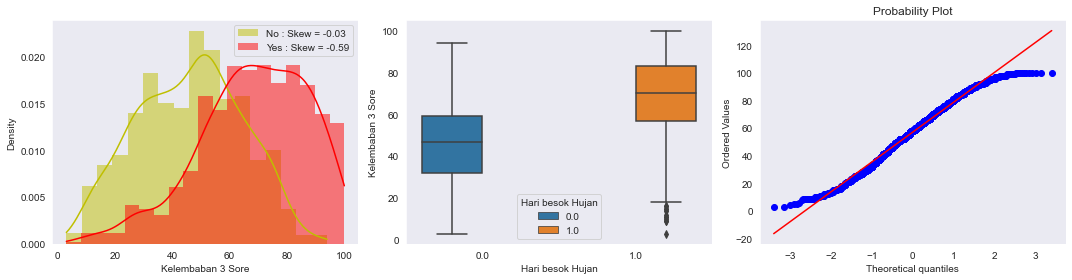

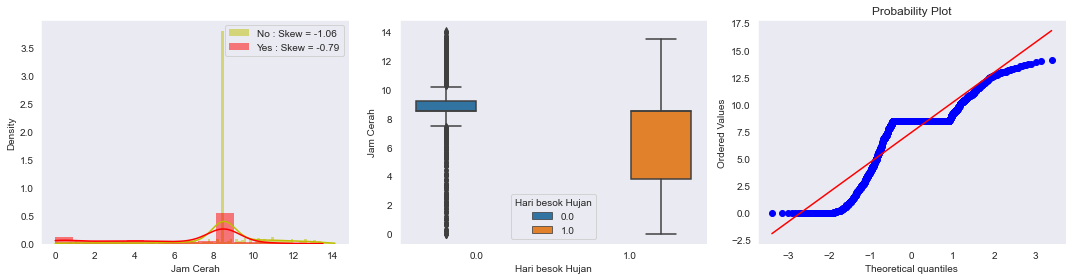

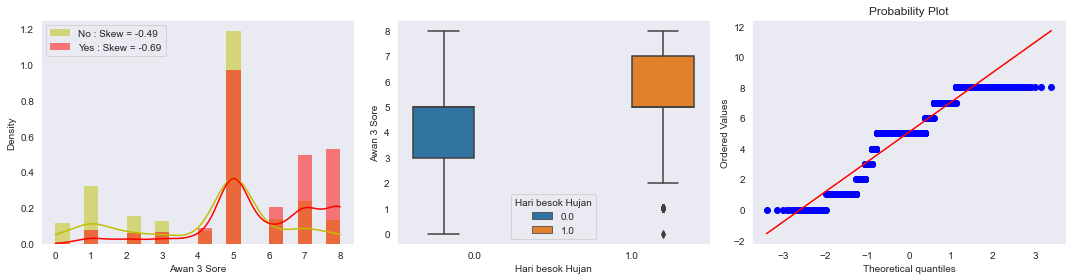

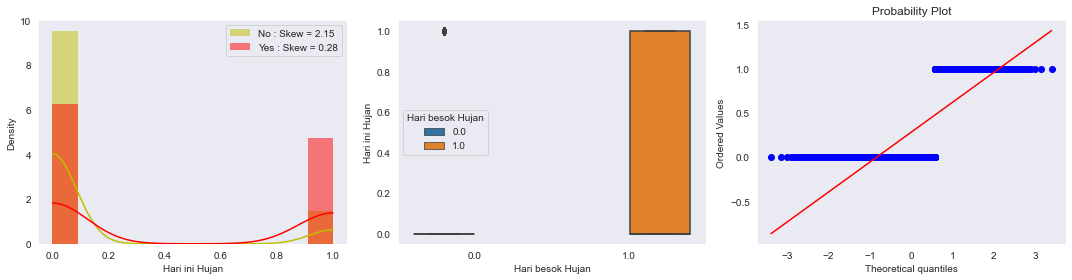

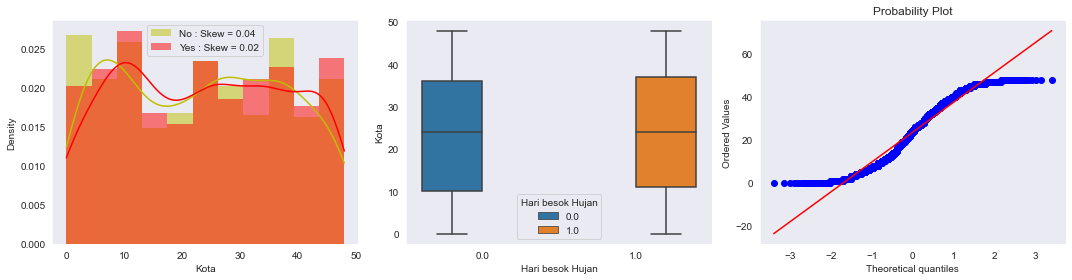

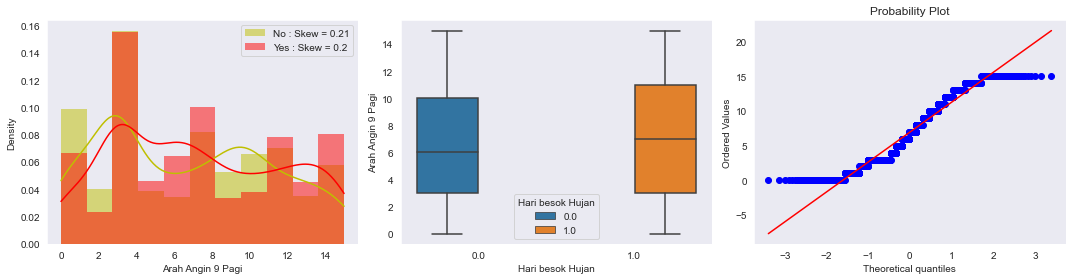

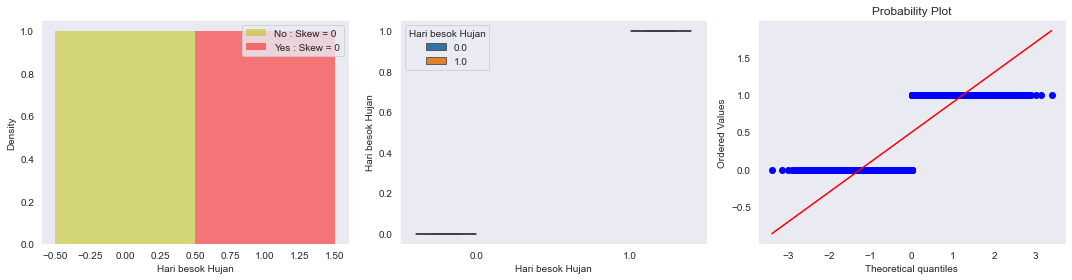

In [59]:
visualize_data_distribution(df2,df2.columns.values)

One Hot Encoding Categorical Features

In [60]:
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
onehot_encoder.fit(X_train[categorical_columns])

encoded_cols = list(onehot_encoder.get_feature_names_out(categorical_columns))

X_train_ohe = onehot_encoder.transform(X_train[categorical_columns])
X_test_ohe = onehot_encoder.transform(X_test[categorical_columns])

X_train_cat = pd.DataFrame(data=X_train_ohe, columns=encoded_cols)
X_test_cat = pd.DataFrame(data=X_test_ohe, columns=encoded_cols)

Concat Numerical and Categorical Features

In [61]:
# kolom numerikal

X_train_num = X_train[numerical_columns].reset_index(drop=True)
X_test_num = X_test[numerical_columns].reset_index(drop=True)

In [62]:
# concat

X_train = pd.concat([X_train_num,X_train_cat],axis=1)
X_test = pd.concat([X_test_num, X_test_cat],axis=1)

# reset index y_train dan y_test agar sama dengan X_train dan X_test

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Features Scaling

In [63]:
# define standardscaler scaler
standard_scaler = StandardScaler()

# fit into training data
standard_scaler.fit(X_train)

# transform into train and test data
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Dimensionality Reduction

In [64]:
pca_ = PCA()
pca_.fit(X_train)

# mencetak nilai eigen setiap principal component
print('Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_)
print('='*30)

# mencetak ratio masing-masing nilai eigen terhadap keseluruhan
print('Rasio Nilai Eigen setiap Principal Component')
print(pca_.explained_variance_ratio_)
print('='*30)

Nilai Eigen setiap Principal Component
[2.18643508 1.05475146 1.00114889 0.7774164  0.50595661 0.47729306]
Rasio Nilai Eigen setiap Principal Component
[0.36422364 0.17570401 0.16677472 0.12950462 0.08428394 0.07950907]


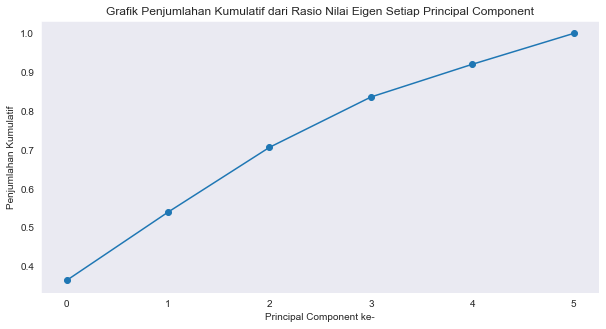

In [65]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_.explained_variance_ratio_), '-o')
plt.title('Grafik Penjumlahan Kumulatif dari Rasio Nilai Eigen Setiap Principal Component')
plt.xlabel('Principal Component ke-')
plt.ylabel('Penjumlahan Kumulatif')
plt.show()

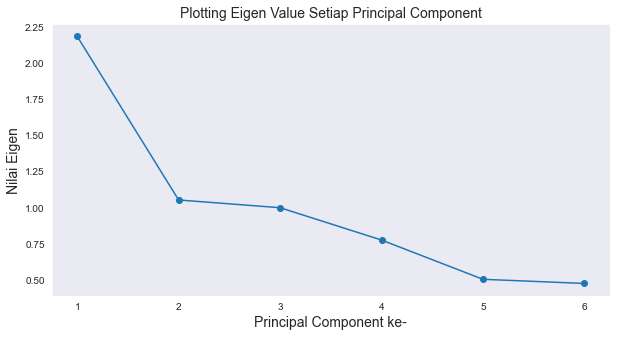

In [66]:
n_component = len(pca_.explained_variance_)
plt.figure(figsize=(10,5))
pd.Series(pca_.explained_variance_).plot(kind='line', marker='o')
plt.xticks(ticks=range(0,n_component), labels=[str(i+1) for i in range(0,n_component)])
plt.xlabel('Principal Component ke-', fontsize=14)
plt.ylabel('Nilai Eigen', fontsize=14)
plt.title('Plotting Eigen Value Setiap Principal Component', fontsize=14)
plt.show()

Menentukan n_best component dengan threshold tertentu

In [67]:
threshold_cumsum = 0.65
best_principal_component = 0
for pc_ke,cumsum in enumerate(np.cumsum(pca_.explained_variance_ratio_)):
    if cumsum >=threshold_cumsum:
        best_principal_component=pc_ke+1
        break
best_principal_component

3

ANALISIS

Dengan menggunakan 3 principal component, kita bisa mempertahankan informasi dari data sebesar += 65%

Fit and Transform PCA dengan best_component yang didapat

In [68]:
# instansiasi objek PCA dengan jumlah komponen terbaik
pca_scaler_ = PCA(n_components=best_principal_component)

# fit into training
pca_scaler_.fit(X_train)

# transform into train and test
X_train_pca = pca_scaler_.transform(X_train)
X_test_pca = pca_scaler_.transform(X_test)

MODELLING

In [69]:
# Inisialisasi fold dan scoring yang digunakan
num_fold = 10
scoring_accuracy ='accuracy'
scoring_recall = 'recall'

In [70]:

# buat list dari seluruh model yang digunakan
models = []

# append model
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(probability=True)))

#k-fold cross validation initialization object
kfold = KFold(n_splits=num_fold, random_state=42, shuffle=True)

In [71]:
def perform_model(models,X_train,y_train,kfold, scoring='accuracy'):
    cv_results = [] #menampung hasil crossvalidation setiap model
    model_names = [] #menampung nama model
    print_msg = [] #menampung pesan yang akan ditampilkan
    
    for model_name, model in models:
        #cross validation result
        cv_result = cross_val_score(model,X_train,y_train, cv=kfold,scoring=scoring)

        #append into list
        cv_results.append(cv_result)
        model_names.append(model_name)

        #print result
        msg_result = '{}: mean {} = {}  std {} = {}'.format(model_name,scoring,cv_result.mean(),scoring,cv_result.std())
        print_msg.append(msg_result)
    
    return cv_results,model_names,print_msg

#Tuning model dengan scoring 'accuracy'

cv_results_accuracy, model_names, print_msg_accuracy = perform_model(
    models=models,
    X_train=X_train_pca,
    y_train=y_train,
    kfold=kfold,
    scoring=scoring_accuracy
)

In [72]:
# cetak hasil rata-rata akurasi setiap model
for msg in print_msg_accuracy:
    print(msg)

Logistic Regression: mean accuracy = 0.7540000000000001  std accuracy = 0.04270831300812525
Support Vector Machine: mean accuracy = 0.752  std accuracy = 0.041785164831552375


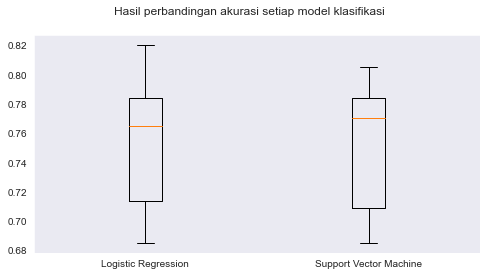

In [74]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Hasil perbandingan akurasi setiap model klasifikasi')
ax = fig.add_subplot(111)

plt.boxplot(cv_results_accuracy, meanline=True)
ax.set_xticklabels(model_names)
fig.set_size_inches(8,4)
plt.show()

ANALISIS

1. Mean accuracy model LR dengan 10-fold cross-validation lebih tinggi dibandingkan dengan model SVM dengan pengaturan parameter default di masing-masing model
2. Model LR sempat menyentuh nilai tertinggi untuk akurasi di salah satu foldnya
3. Kedua model sempat menyentuh nilai terendah untuk akurasi di salah satu foldnya, namun pada model SVM nilai itu tidak dianggap sebagai pencilan. Berbeda halnya dengan LR yang menyatakan nilai itu sebagai pencilan

Classification Report

In [75]:
def print_classification_report(y_train,y_test,y_pred_train,y_pred_test,model_name):
    # print score
    print('AKURASI')
    print('Training Accuracy score {}  = {}%'.format(model_name,(metrics.accuracy_score(y_train,y_pred_train))*100))
    print('Testing Accuracy score {}  = {}%'.format(model_name,(metrics.accuracy_score(y_test,y_pred_test))*100))
    print()
    print('RECALL')
    print('Training Recall score {}  = {}%'.format(model_name,(metrics.recall_score(y_train,y_pred_train))*100))
    print('Testing Recall score {}  = {}%'.format(model_name,(metrics.recall_score(y_test,y_pred_test))*100))
    print('='*100)
    print('Confusion Matrix of {} on Training'.format(model_name))
    print(metrics.confusion_matrix(y_train,y_pred_train))
    print('Confusion Matrix of {} on Testing'.format(model_name))
    print(metrics.confusion_matrix(y_test,y_pred_test))
    print('='*100)
    # hasil klasifikasi
    print('Detailed Classification Report of {} on Training'.format(model_name))
    print(metrics.classification_report(y_train,y_pred_train))
    print('Detailed Classification Report of {} on Testing'.format(model_name))
    print(metrics.classification_report(y_test,y_pred_test))

In [76]:
def predict_proba(y_true, y_probability, thresholds=[round(i,2) for i in np.arange(0,1,0.1)], scoring='recall'):
    thresholds_predict = {}
    thresholds_results = {}
    for threshold in thresholds:
        thresholds_predict[threshold] = []
        for y_prob in y_probability:
            if y_prob[0]>=threshold:
                thresholds_predict[threshold].append(0)
            else:
                thresholds_predict[threshold].append(1)
        y_prediction = np.array(thresholds_predict[threshold])
        if scoring=='accuracy':
            thresholds_results[threshold] = metrics.accuracy_score(y_true,y_prediction)*100
        elif scoring=='recall':
            thresholds_results[threshold] = metrics.recall_score(y_true, y_prediction)*100
    return thresholds_predict,thresholds_results

Support Vector Machine (SVM)

In [78]:
# inisialisasi model
svm_balanced = SVC(probability=True)
# fit model into training data
svm_balanced.fit(X_train_pca,y_train)
# get y prediction
y_pred_train_svm_balanced = svm_balanced.predict(X_train_pca)
y_pred_test_svm_balanced = svm_balanced.predict(X_test_pca)

print_classification_report(y_train,y_test,y_pred_train_svm_balanced,y_pred_test_svm_balanced,'SVM')

AKURASI
Training Accuracy score SVM  = 75.7%
Testing Accuracy score SVM  = 74.91443574476065%

RECALL
Training Recall score SVM  = 73.2%
Testing Recall score SVM  = 72.86416396528286%
Confusion Matrix of SVM on Training
[[782 218]
 [268 732]]
Confusion Matrix of SVM on Testing
[[24989  8106]
 [ 2595  6968]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1000
         1.0       0.77      0.73      0.75      1000

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.82     33095
         1.0       0.46      0.73      0.57      9563

    accuracy                           0.75     42658
   macro avg       0.68      0.74      0.69    

ANALISIS SUPPORT VECTOR MACHINE (SVM)

1. Dengan parameter default, SVM yang sudah dilatih dengan 1000 subsampel data latih menunjukkan adanya penurunan nilai akurasi dan recall dari data latih ke data uji. Dengan kata lain terjadi overfitting. Hal ini dikarenakan jumlah principal component (feature) yang digunakan masih terbilang cukup banyak.
2. Model SVM juga tidak bisa mengeneralisasi data latih yang mengakibatkan performa data ujinya kurang baik. Precision untuk kelas (1 : 'yes') pada confusion matrix data testing terbilang masih cukup rendah. Namun recall untuk kedua kelas pada data uji terbilang cukup baik yang berada di kisaran (70%)
3. Sampel dataset awal berjumlah 145.000an baris, sedangkan pada pelatihan dengan SVM digunakan subsampel yang 145x lebih sedikit dibandingkan jumlah sampel awalnya. Hal ini bisa menyebabkan model kurang belajar terhadap data latih yang ada. Pengambilan subsampel tersebut juga dilakukan secara random tanpa memperhatikan karakteristik setiap fitur dalam membedakan kelas
4. Penurunan akurasi dari pelatihan data training dan pengujian data uji adalah (75.7%-74.9%) = 0.8%
5. Penurunan recall dari pelatihan data training dan pengujian data uji adalah (73.2-72.8) = 0.4%

Logistic Regression

In [80]:
# inisialisasi model
logreg_balanced = LogisticRegression()
# fit model into training data
logreg_balanced.fit(X_train_pca,y_train)
# get y prediction
y_pred_train_logreg_balanced = logreg_balanced.predict(X_train_pca)
y_pred_test_logreg_balanced = logreg_balanced.predict(X_test_pca)

print_classification_report(y_train,y_test,y_pred_train_logreg_balanced,y_pred_test_logreg_balanced,'Logistic Regression')

AKURASI
Training Accuracy score Logistic Regression  = 75.35%
Testing Accuracy score Logistic Regression  = 74.33072342819635%

RECALL
Training Recall score Logistic Regression  = 73.6%
Testing Recall score Logistic Regression  = 73.74254940918122%
Confusion Matrix of Logistic Regression on Training
[[771 229]
 [264 736]]
Confusion Matrix of Logistic Regression on Testing
[[24656  8439]
 [ 2511  7052]]
Detailed Classification Report of Logistic Regression on Training
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76      1000
         1.0       0.76      0.74      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Detailed Classification Report of Logistic Regression on Testing
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     33095
         1.0       0.46    

ANALISIS LOGISTIC REGRESSION

1. Dengan parameter default, logistic regression yang sudah dilatih dengan 1000 subsampel data latih menunjukkan adanya penurunan nilai akurasi dan recall dari data latih ke data uji. Dengan kata lain terjadi overfitting. Hal ini dikarenakan jumlah principal component (feature) yang digunakan masih terbilang cukup banyak.
2. Model logistic regression tidak bisa mengeneralisasi data latih yang mengakibatkan performa data ujinya kurang baik. Precision untuk kelas (1 : "yes") pada confusion matrix data testing terbilang masih cukup rendah. Namun recall untuk kedua kelas pada data uji terbilang cukup baik yang berada dikisaran (70%)
3. Sampel dataset awal berjumlah 145.000an baris, sedangkan pada pelatihan dengan logistic regression digunakan subsampel yang 145x lebih sedikit dibandingkan jumlah sampel awalnya. Hal ini bisa menyebabkan model kurang belajar terhadap data latih yang ada. Pengambilan subsampel tersebut juga dilakukan secara random tanpa memperhatikan karakteristik setiap fitur dalam membedakan kelas
4. Penurunan akurasi dari pelatihan data training dan pengujian data uji adalah (75.3 - 74.3) = 1%
5. Penurunan recall dari pelatihan data training dan pengujian data uji adalah (73.7-73.6) = 0.1%

ANALISIS KEDUA MODEL

1. Penurunan akurasi logistic regression sebesar 1% sedangkan SVM sebesar 0.8%
2. Penurunan recall logistic regression sebesar 0.1% sedangkan SVM sebesar 0.4%

Hyperparameter Logistic Regression Model

In [85]:
# inisialisasi LogReg Model
logreg_params_tuned_model = LogisticRegression()

# inisialisasi objek KFold dengan k=10
kfold = kfold

# inisialisasi daftar hyperparameter yang akan dituning
logreg_params_grid={
    'C':[0.01,0.1,1],
    'tol':[0.1,0.01,0.001],
    'solver':['lbfgs', 'liblinear', 'sag', 'saga','newton-cg'],
}

# instansiasi grid seach objek
grid_params_logreg = GridSearchCV(
    estimator= logreg_params_tuned_model,
    param_grid=logreg_params_grid,
    scoring=scoring_recall,
    cv = kfold
)

# fit grid objek ke data train
grid_results_logreg_ = grid_params_logreg.fit(X_train_pca,y_train)

# Cetak hyperparameter yang memberikan hasil terbaik
print('Best Logistic Regression Hyperparameter: {}'.format(grid_results_logreg_.best_params_))
print('Best Logistic Regression Recall Score: {}'.format(grid_results_logreg_.best_score_*100),"%")

Best Logistic Regression Hyperparameter: {'C': 0.01, 'solver': 'sag', 'tol': 0.1}
Best Logistic Regression Recall Score: 74.2773178974838 %


Hyperparameter SVM Model

In [84]:
# inisialisasi SVM model
svm_params_tuned_model = SVC()

# inisialisasi objek KFold dengan k=10
kfold = kfold

# inisialisasi daftar hyperparameter yang akan dituning
params_grid={
    'C':[0.01,0.1,1],
    'kernel' : ['linear', 'poly', 'rbf'],
    'gamma':['scale','auto'],
}

# instansiasi grid seach objek
grid_params_svm = GridSearchCV(
    estimator= svm_params_tuned_model,
    param_grid=params_grid,
    scoring=scoring_recall,
    cv = kfold
)

# fit grid objek ke data train
grid_results_svm_ = grid_params_svm.fit(X_train_pca,y_train)

# Cetak hyperparameter yang memberikan hasil terbaik
print('Best SVM Hyperparameter: {}'.format(grid_results_svm_.best_params_))
print('Best SVM Recall Score: {}'.format(grid_results_svm_.best_score_*100),"%")

Best SVM Hyperparameter: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Recall Score: 73.34792314353854 %



ANALISIS Hyperparameter Tuning Logistic Regression dan SVM

1. Rata-rata recall Logistic Regression sebesar 74.2773178974838% dengan pengaturan parameter {'C': 0.01, 'solver': 'sag', 'tol': 0.1}
2. Rata-rata recall SVM sebesar 73.34792314353854% dengan pengaturan parameter {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
3. Sementara, model Logistic Regression memberikan performa recall yang lebih baik dibandingkan dengan SVM

**EVALUASI MODEL**

Logistic Regression

In [86]:
# inisialisasi model LR dengan hyperparameter terbaik hasil tuning
logreg_final = LogisticRegression(
    C=grid_results_logreg_.best_params_['C'],
    tol=grid_results_logreg_.best_params_['tol'],
    solver=grid_results_logreg_.best_params_['solver'],
)

# fit model into training data
logreg_final.fit(X_train_pca,y_train)

# get y prediction
y_pred_train_logreg = logreg_final.predict(X_train_pca)
y_pred_test_logreg = logreg_final.predict(X_test_pca)

# get X_test probability
y_prob_test_logreg = logreg_final.predict_proba(X_test_pca)

print_classification_report(y_train,y_test,y_pred_train_logreg,y_pred_test_logreg,'Logistic Regression')

AKURASI
Training Accuracy score Logistic Regression  = 74.5%
Testing Accuracy score Logistic Regression  = 76.93515870411177%

RECALL
Training Recall score Logistic Regression  = 67.9%
Testing Recall score Logistic Regression  = 67.43699675833943%
Confusion Matrix of Logistic Regression on Training
[[811 189]
 [321 679]]
Confusion Matrix of Logistic Regression on Testing
[[26370  6725]
 [ 3114  6449]]
Detailed Classification Report of Logistic Regression on Training
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76      1000
         1.0       0.78      0.68      0.73      1000

    accuracy                           0.74      2000
   macro avg       0.75      0.75      0.74      2000
weighted avg       0.75      0.74      0.74      2000

Detailed Classification Report of Logistic Regression on Testing
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84     33095
         1.0       0.49     

ANALISIS Evaluasi Model LogReg dengan Parameter Optimal

1. Parameter optimal {'C': 0.01, 'solver': 'sag', 'tol': 0.1}
2. Masih terjadi overfitting
3. Penurunan akurasi dari 76.9% menjadi 74.5% sebesar 2.4%
4. Penurunan recall dari 67.9% menjadi 67.4% sebesar 0.5%
5. Walaupun recall cukup baik (kisaran 70%), LogReg masih memberikan precision yang rendah untuk kelas 1 ("yes") pada data testing

In [87]:
logreg_threshold_predict_, logreg_threshold_results_ = predict_proba(y_test,y_prob_test_logreg)
df_logreg_threshold_predict_ = pd.DataFrame(data=logreg_threshold_predict_)


for threshold in [round(i,2) for i in np.arange(0,1,0.1)]:
    print('THRESHOLD ',threshold)
    y_pred = np.array(df_logreg_threshold_predict_[threshold])
    print(metrics.classification_report(y_test,y_pred,labels=np.unique(y_pred)))

THRESHOLD  0.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.1
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     33095
           1       0.87      0.06      0.11      9563

    accuracy                           0.79     42658
   macro avg       0.83      0.53      0.49     42658
weighted avg       0.80      0.79      0.71     42658

THRESHOLD  0.2
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     33095
           1       0.73      0.20      0.31      9563

    accuracy                           0.80     42658
   macro avg       0.77      0.59      0.60     42658
weighted avg       0.79      0.80      0.76     42658

THRESHOLD  0.3
             

SVM

In [88]:
# inisialisasi model SVM dengan hyperparameter terbaik hasil tuning
svm_final = SVC(
    C=grid_results_svm_.best_params_['C'],
    kernel=grid_results_svm_.best_params_['kernel'],
    gamma=grid_results_svm_.best_params_['gamma'],
    probability=True
)

# fit model into training data
svm_final.fit(X_train_pca,y_train)

# get y prediction
y_pred_train_svm = svm_final.predict(X_train_pca)
y_pred_test_svm = svm_final.predict(X_test_pca)

# get X_test probability
y_prob_test_svm = svm_final.predict_proba(X_test_pca)

print_classification_report(y_train,y_test,y_pred_train_svm,y_pred_test_svm,'SVM')

AKURASI
Training Accuracy score SVM  = 75.4%
Testing Accuracy score SVM  = 74.69642271086315%

RECALL
Training Recall score SVM  = 73.3%
Testing Recall score SVM  = 72.94781972184461%
Confusion Matrix of SVM on Training
[[775 225]
 [267 733]]
Confusion Matrix of SVM on Testing
[[24888  8207]
 [ 2587  6976]]
Detailed Classification Report of SVM on Training
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76      1000
         1.0       0.77      0.73      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Detailed Classification Report of SVM on Testing
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82     33095
         1.0       0.46      0.73      0.56      9563

    accuracy                           0.75     42658
   macro avg       0.68      0.74      0.69    

ANALISIS Evaluasi Model SVM dengan Parameter Optimal

1. Parameter optimal {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
2. Masih terjadi overfitting
3. Penurunan akurasi dari 75.4% menjadi 74.6% sebesar 0.9%
4. Penurunan recall dari 73.3% menjadi 72.9% sebesar 0.4%
5. Akurasi yang diberikan SVM juga terbilang cukup rendah untuk data latih dan data uji

In [89]:
svm_threshold_predict_, svm_threshold_results_ = predict_proba(y_test,y_prob_test_svm)
df_svm_threshold_predict_ = pd.DataFrame(data=svm_threshold_predict_)


for threshold in [round(i,2) for i in np.arange(0,1,0.1)]:
    print('THRESHOLD ',threshold)
    y_pred = np.array(df_svm_threshold_predict_[threshold])
    print(metrics.classification_report(y_test,y_pred,labels=np.unique(y_pred)))

THRESHOLD  0.0
              precision    recall  f1-score   support

           0       0.78      1.00      0.87     33095

   micro avg       0.78      1.00      0.87     33095
   macro avg       0.78      1.00      0.87     33095
weighted avg       0.78      1.00      0.87     33095

THRESHOLD  0.1
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     33095
           1       0.76      0.15      0.25      9563

    accuracy                           0.80     42658
   macro avg       0.78      0.57      0.56     42658
weighted avg       0.79      0.80      0.74     42658

THRESHOLD  0.2
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     33095
           1       0.65      0.33      0.43      9563

    accuracy                           0.81     42658
   macro avg       0.74      0.64      0.66     42658
weighted avg       0.79      0.81      0.78     42658

THRESHOLD  0.3
             

PENGAMBILAN KEPUTUSAN

Berdasarkan performa SVM saat dievaluasi dengan parameter optimalnya, SVM cenderung tidak lebih baik dibandingkan dengan Logistik regression. Oleh karena itu, model yang akan dikembangkan adalah model Logistik Regression.
Untuk 1000 subsampel data latih yang digunakan dari sekitar 145.000 sampel dataset, SVM cenderung tidak bisa mengeneralisasi data latih yang mengakibatkan performanya pada data uji yang terbilang rendah. Berbanding terbalik dengan LogReg yang cukup bisa mengeneralisasi data latih yang mengakibatkan performarnya pada data uji yang cukup baik tetapi nilai uji keduanya berada di kisaran 70%.
Setelah dituning hyperparameter, kedua model tersebut tidak bisa memberikan nilai precision yang baik untuk kelas 1 pada data uji.